# Title

Filtering Noisy Signals Using Fast Fourier Transform

# Abstract

This project focuses on tackling the challenge of filtering out noisy signals by implementing the Fast Fourier Transform as fundamental tool for data analysis. The primary objective is to assess the efficiency of noise reduction while retaining key signal characteristics.

# Background and Motivation

Noisy signals are common in various scientific and engineering domains. Filtering noisy signals is a critical step in extracting meaningful information and improving the accuracy of analysis. The choice of filtering technique and its parameters can significantly impact the quality of the results. While there are well-established methods for noise reduction, adapting and optimizing these techniques for specific datasets and applications can be challenging.
The proposed method draws from the literature on Fourien-based noise reduction methods. Various studies have explored the application of the Fourier Transform in signal processinn. However, the task at hand is to combine these techniques and evaluate their effectiveness in filtering noisy signal


# Python Packages

In this project, we'll leverage the capabilities of numpy, matplotlib, and scipy for comprehensive data analysis. Additionally, we will utilize IPython for the purpose of displaying audio content (example.wav).

We'll begin by importing the necessary packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
from scipy.fft import fft, ifft, fftfreq, fftshift, rfft, rfftfreq, irfft
from scipy.signal import spectrogram
import sys
%matplotlib inline

# Fast Fourier Transform (FFT)

First, let's create a clean signal consists of two sin waves with 50Hz and 120Hz from t=0 to t=1 with time steps of 0.001. Then, we'll add random white noise with magnitude of 2.5 to the clean signal to generate a noisy signal.

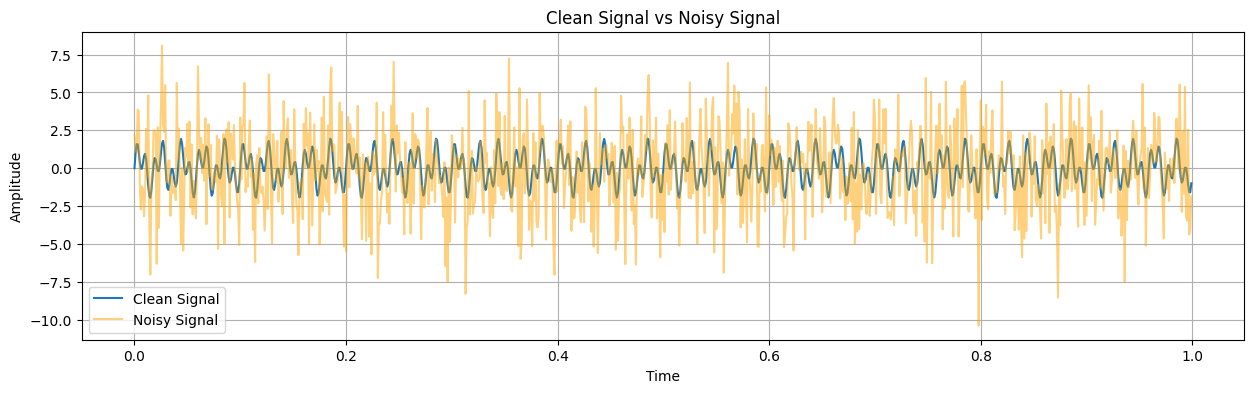

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.001
t = np.arange(0, 1, dt)

clean_signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
clean = clean_signal
noisy_signal = clean + 2.5*np.random.randn(len(t))

plt.figure(figsize=(15, 4))
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.5, color='orange')  # alpha controls transparency
plt.title('Clean Signal vs Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

We will now utilize the rfft function to perform Fourier transforms on both signals. Then, we will plot both signals in frequency domain.

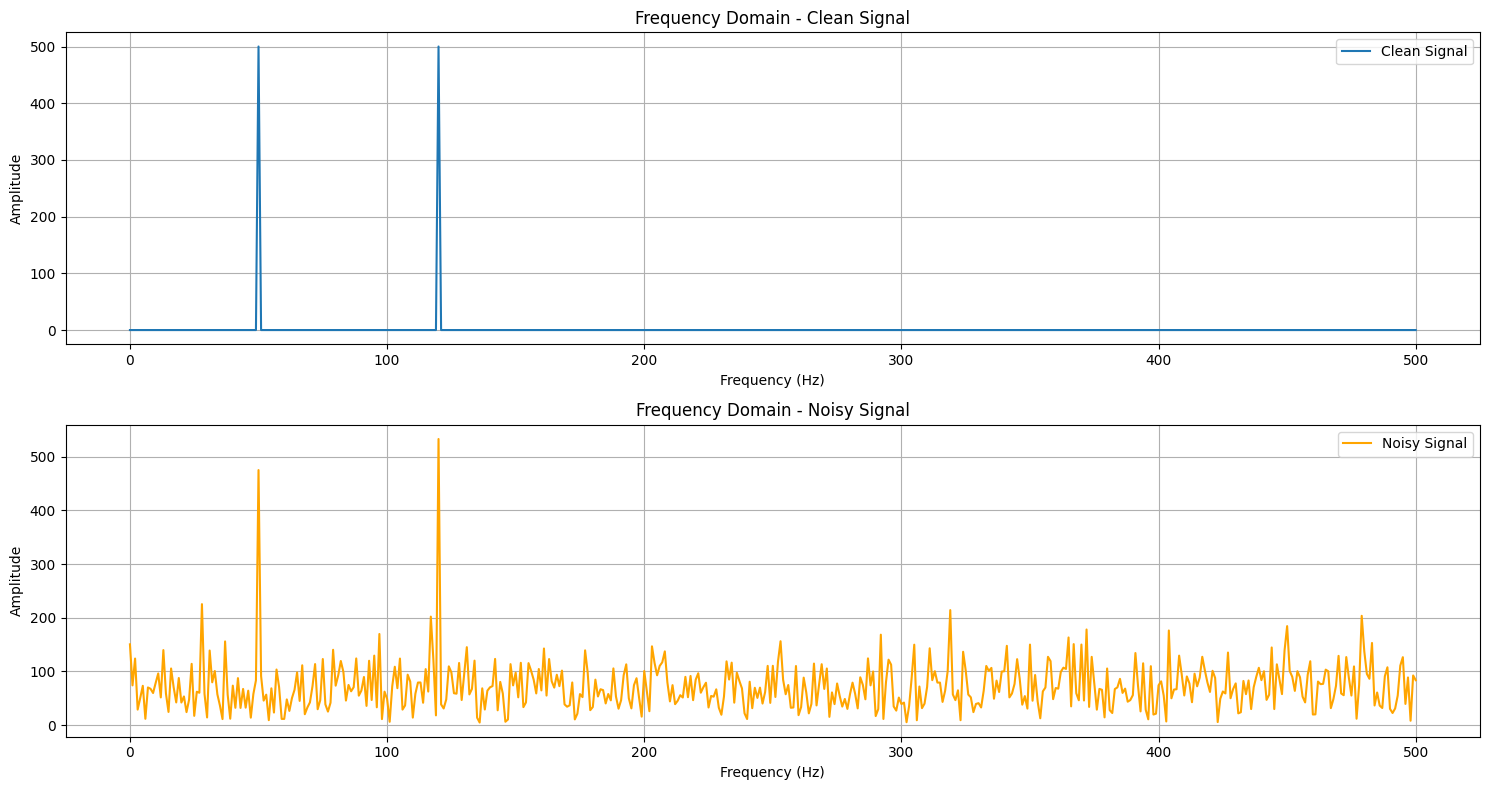

In [3]:
# Compute FFT for clean signal and noisy signal using rfft
n = len(t)
frequencies = rfftfreq(n, dt)
clean_fft = rfft(clean_signal)
noisy_fft = rfft(noisy_signal)

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(clean_fft), label='Clean Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain - Clean Signal')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(noisy_fft), label='Noisy Signal', color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain - Noisy Signal')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Observing the frequency domain plots of both signals, two peaks with significant amplitudes stand out among other frequencies. To explore the impact of different thresholds, we will experiment with setting certain thresholds to zero out frequencies with amplitudes below the specified threshold. This analysis aims to investigate how manipulating these thresholds affects the representation of the noisy signal in the frequency domain.

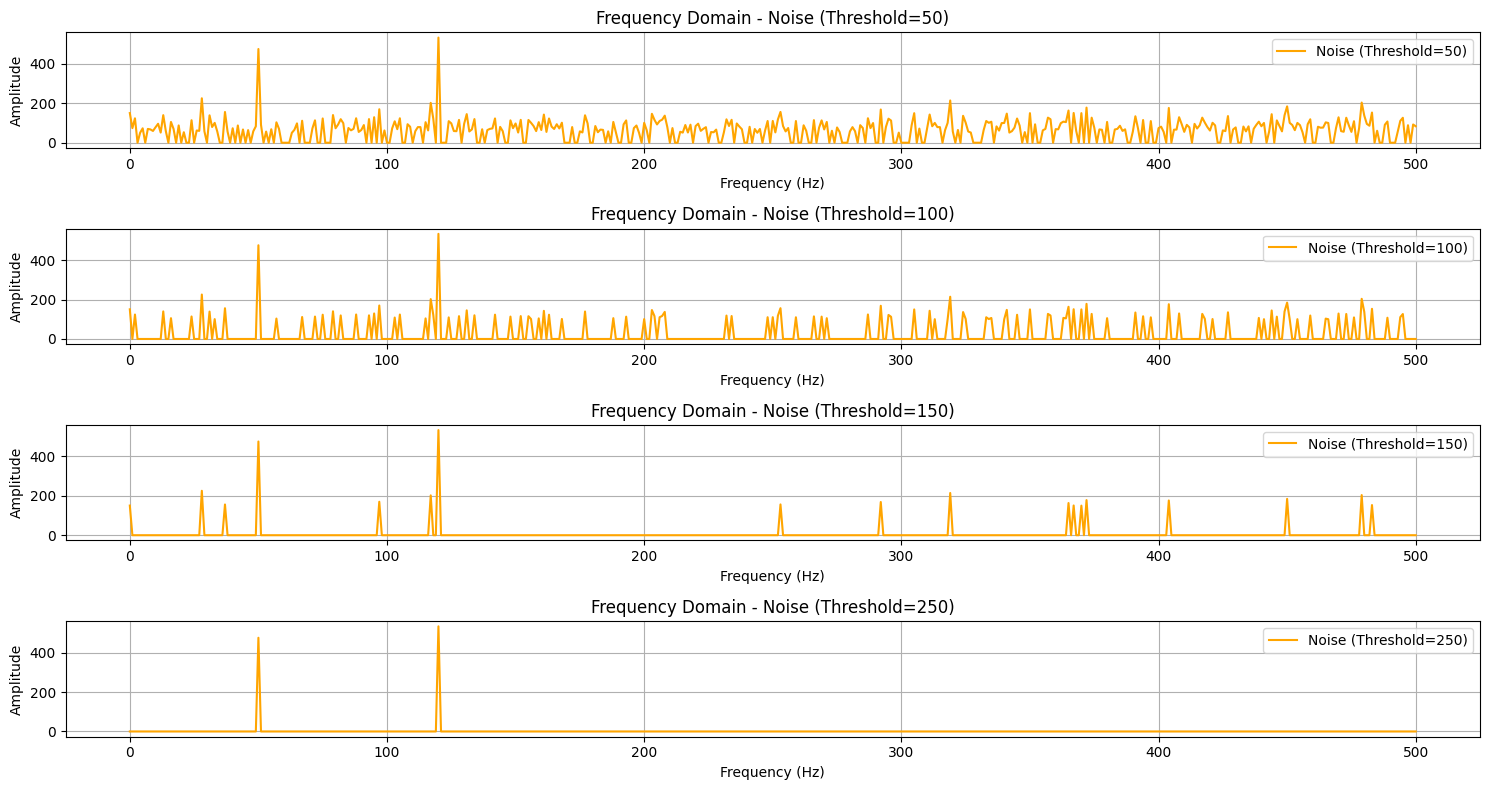

In [4]:
thresholds = [50, 100, 150, 250]  # Set different thresholds to filter out noise

plt.figure(figsize=(15, 8))

for i, threshold in enumerate(thresholds):
    # Filter out noise by setting amplitudes below the threshold to zero
    mask = np.abs(noisy_fft) < threshold
    noisy_fft_filtered = noisy_fft.copy()
    noisy_fft_filtered[mask] = 0


    plt.subplot(4, 1, i + 1)
    plt.plot(frequencies, np.abs(noisy_fft_filtered), label=f'Noise (Threshold={threshold})', color='orange')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'Frequency Domain - Noise (Threshold={threshold})')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Next, we will transform the filtered frequency-domain signal back to the time domain. Following this, we will compare the filtered signals with the original clean signal.

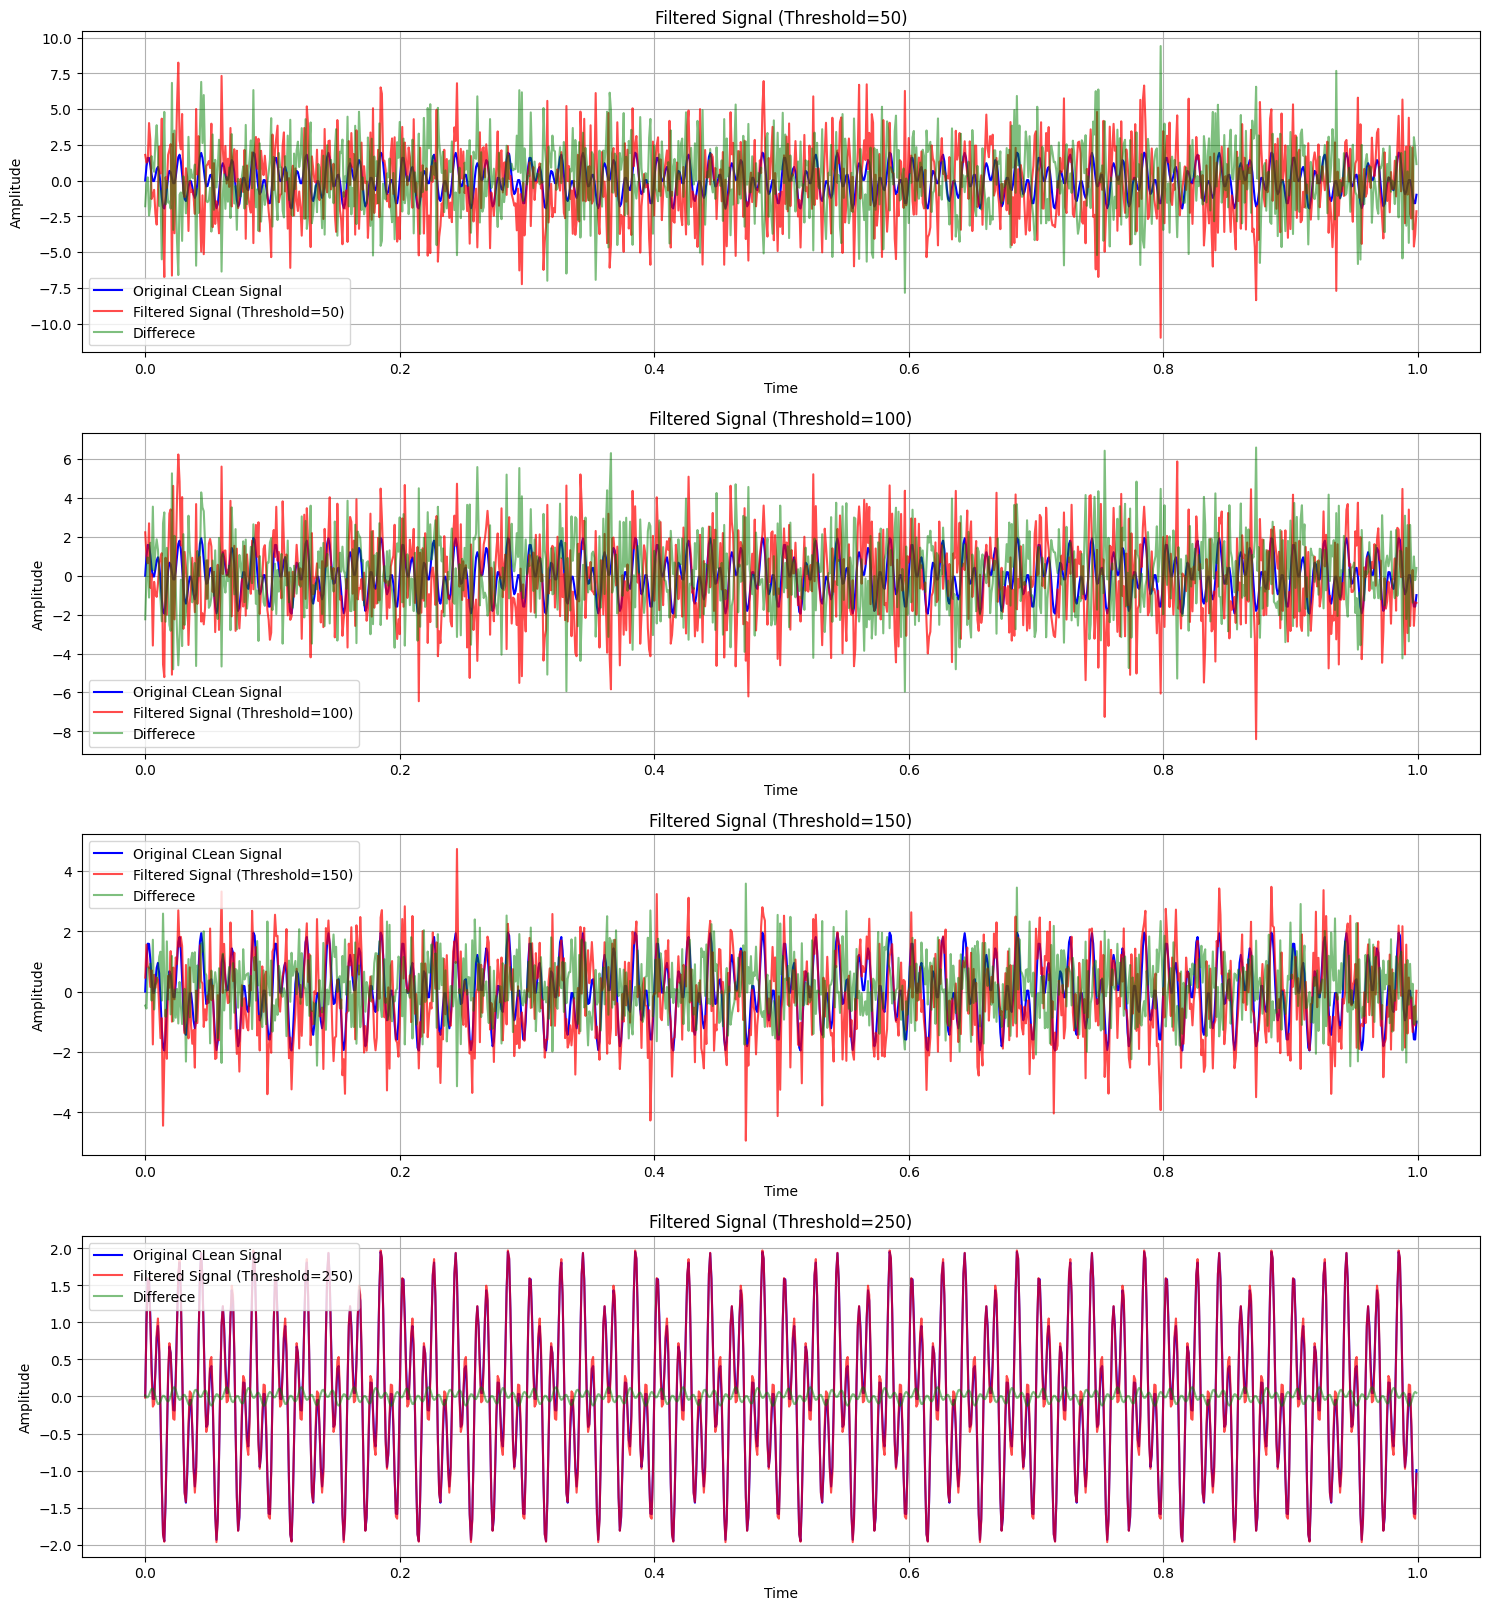

In [5]:
plt.figure(figsize=(15, 20))

for i, threshold in enumerate(thresholds):
    # Filter out noise by setting amplitudes below the threshold to zero
    mask = np.abs(noisy_fft) < threshold
    noisy_fft_filtered = noisy_fft.copy()
    noisy_fft_filtered[mask] = 0

    noisy_signal_filtered = irfft(noisy_fft_filtered)  # transforms the filtered frequency-domain signal back to the time domain

    plt.subplot(len(thresholds) + 1, 1, i + 2)
    plt.plot(t, clean_signal, label='Original CLean Signal', color='blue')
    plt.plot(t, noisy_signal_filtered, label=f'Filtered Signal (Threshold={threshold})', color='red', alpha=0.7)
    plt.plot(t, clean_signal - noisy_signal_filtered, label='Differece', color='green', alpha=0.5)
    plt.title(f'Filtered Signal (Threshold={threshold})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# FFT Implementation

Let's play the original example.wav file, which features a woman uttering four numbers amidst some background noise. We'll explore the potential for denoising the audio using FFT.

In [6]:
audio_file = "example.wav"
sample_rate, data = wavfile.read(audio_file)

audio_widget = Audio(data=data, rate=sample_rate)
display(audio_widget)

Let's visualize the audio file through a time-domain signal plot.

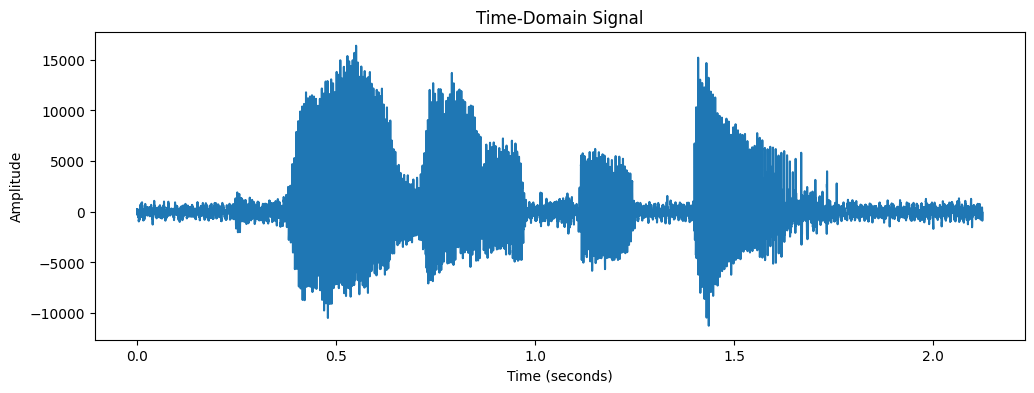

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(data)) / sample_rate, data)
plt.title('Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

Perform a Fast Fourier Transform on the noisy signal.




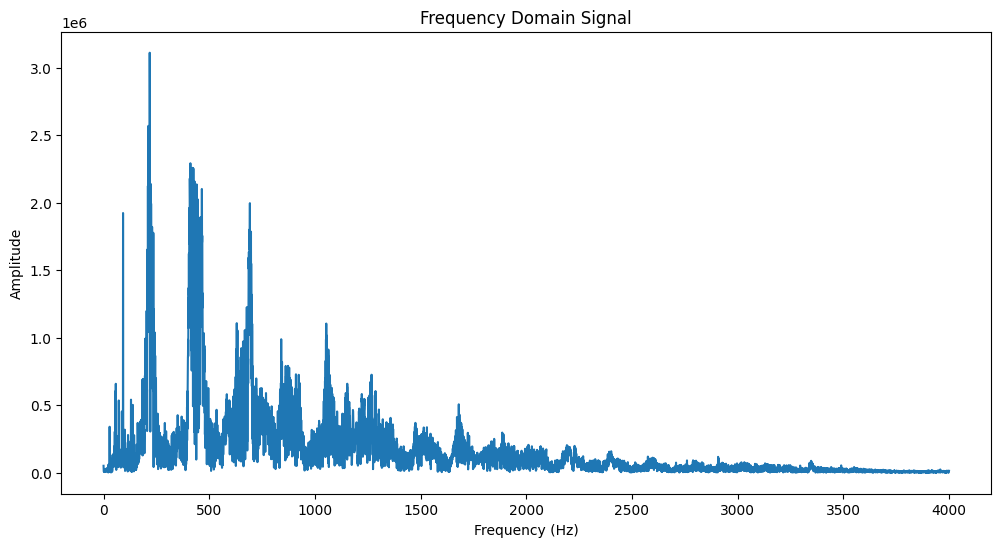

In [8]:
# Apply FFT to the noisy signal
t = np.arange(len(data)) / sample_rate
noisy_fft = rfft(data)
frequencies = rfftfreq(len(data), 1/sample_rate)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(noisy_fft))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

Additionally, we can enhance signal visualization by generating a spectrogram. Notably, the signal exhibits its highest intensity within the frequency range of 500-3000Hz.

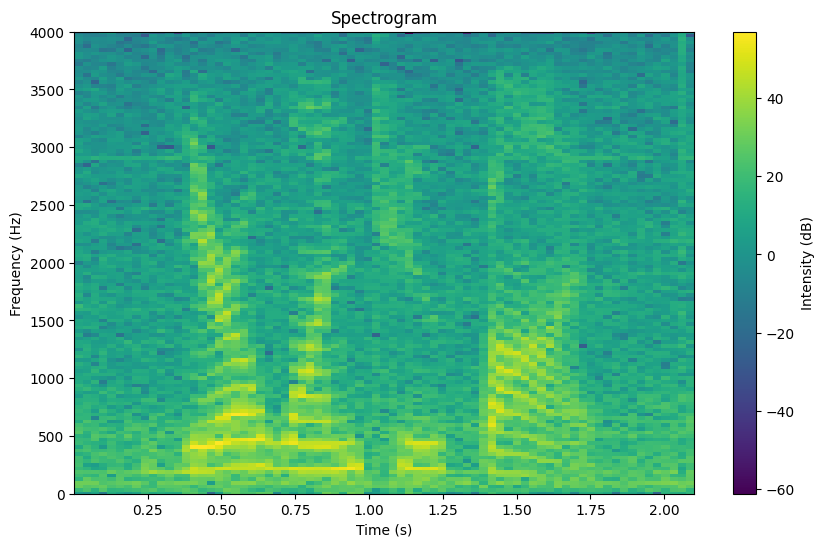

In [9]:
# Function to display a spectrogram
def plot_spectrogram(audio_data, sample_rate):
    f, t, Sxx = spectrogram(audio_data, fs=sample_rate)

    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Intensity (dB)')
    plt.ylim([0, 4000])  # Frequency range
    plt.show()


plot_spectrogram(data, sample_rate)

Let's establish thresholds to eliminate frequencies with amplitudes below a certain level.

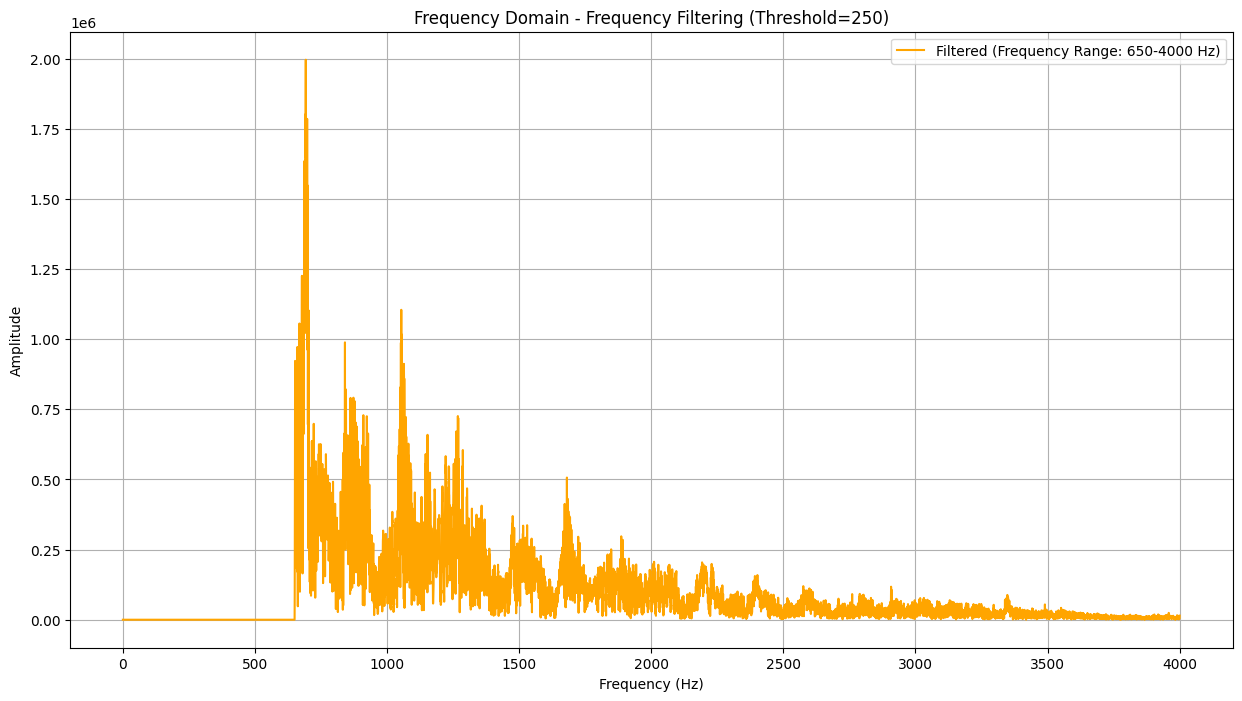

In [10]:
# Define the frequency range to keep
low_freq = 650  # in Hz
high_freq = 4000  # in Hz
max_threshold = 4e6  
min_threshold = 0

plt.figure(figsize=(15, 8))

# Zero out frequencies outside the desired range
mask = (frequencies < low_freq) | (frequencies > high_freq) | (np.abs(noisy_fft) > max_threshold) | (np.abs(noisy_fft) < min_threshold)
noisy_fft_filtered = noisy_fft.copy()
noisy_fft_filtered[mask] = 0

plt.plot(frequencies, np.abs(noisy_fft_filtered), label=f'Filtered (Frequency Range: {low_freq}-{high_freq} Hz)', color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title(f'Frequency Domain - Frequency Filtering (Threshold={threshold})')
plt.grid(True)
plt.legend()
plt.show()


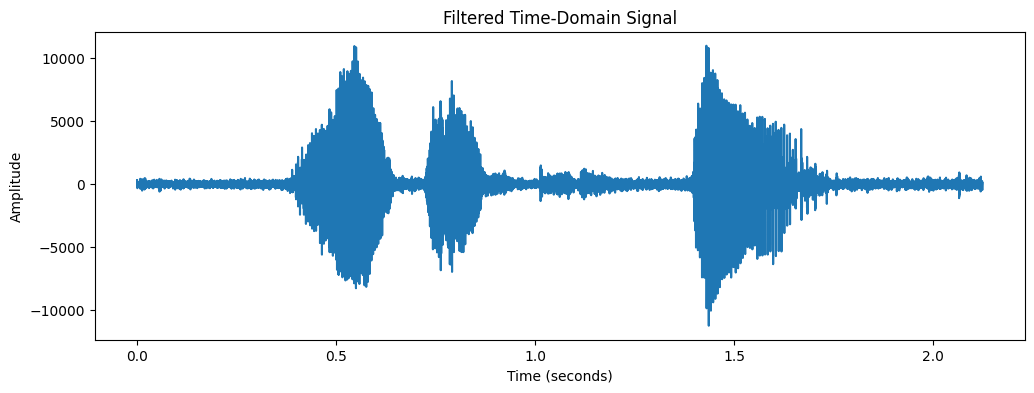

In [11]:
# Perform the inverse FFT to get the filtered time-domain signal
noisy_signal_filtered = irfft(noisy_fft_filtered)
plt.figure(figsize=(12, 4))
plt.plot(t, noisy_signal_filtered)
plt.title('Filtered Time-Domain Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [12]:
audio_widget = Audio(data=noisy_signal_filtered, rate=sample_rate)
display(audio_widget)

# Other Implementations

# High-Pass Filter

High-pass filters are particularly effective in denoising signals when the noise or unwanted components primarily reside in the low-frequency range. In audio signals, for instance, low-frequency noise such as hums, rumbles, or background interference can be efficiently removed using high-pass filters. This is because high-pass filters allow higher frequencies to pass through while attenuating lower frequencies. In scenarios where the goal is to eliminate low-frequency noise and highlight the presence of higher-frequency signals, a high-pass filter proves to be a valuable tool.

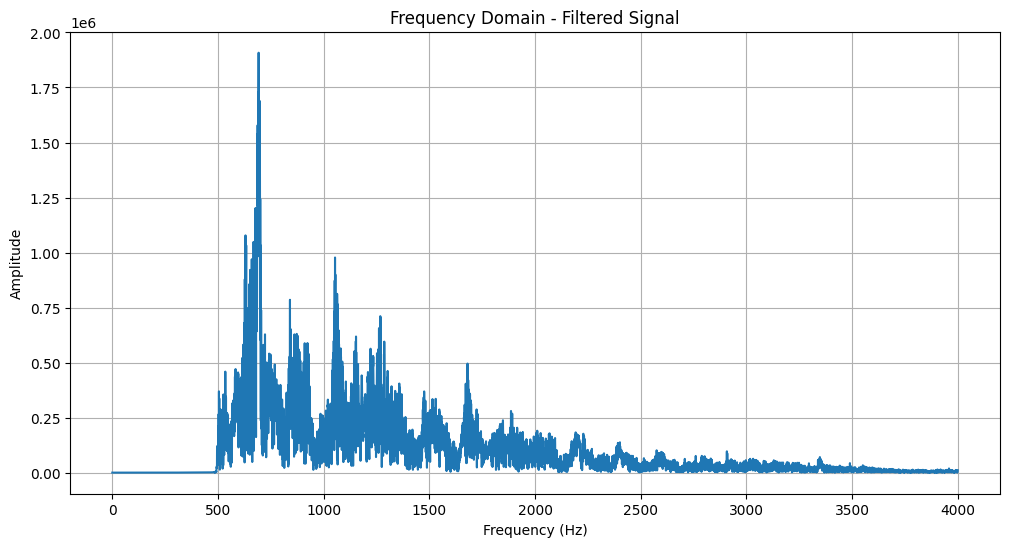

In [13]:
from scipy.signal import ellip, filtfilt

# Read in the sound data
sample_rate, data = wavfile.read('example.wav')

# hhigh-pass filter at 500 Hz
nyquist = 0.5 * sample_rate
low_cutoff = 500.0 / nyquist
b, a = ellip(8, 1, 50, low_cutoff, 'high')

# Apply the filter
filtered_data = filtfilt(b, a, data)

frequencies = rfftfreq(len(filtered_data), 1/sample_rate)
filtered_fft = rfft(filtered_data)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(filtered_fft))
plt.title('Frequency Domain - Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Audio(filtered_data, rate=sample_rate)

# Low-Pass Filter

Conversely, low-pass filters are advantageous in denoising signals when the unwanted noise or interference is predominantly in the high-frequency spectrum. Low-pass filters permit the passage of lower frequencies while attenuating higher frequencies, making them suitable for applications where preserving the low-frequency content is crucial, and eliminating high-frequency noise is essential for signal clarity.

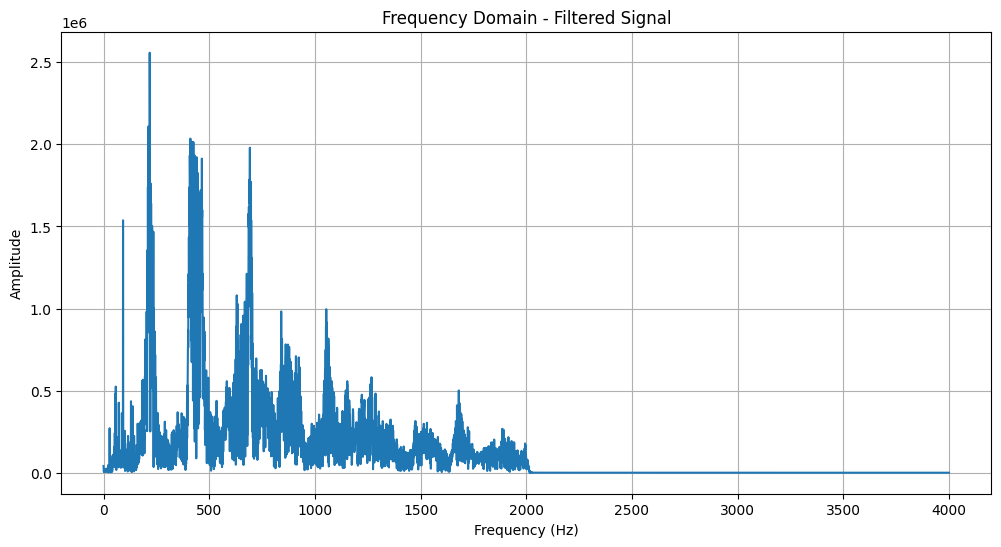

In [14]:
from scipy.signal import ellip, filtfilt

# Read in the sound data
sample_rate, data = wavfile.read('example.wav')

# Low-pass filter at 2000 Hz
nyquist = 0.5 * sample_rate
high_cutoff = 2000.0 / nyquist
b, a = ellip(8, 1, 50, high_cutoff, 'low')

# Apply the filter
filtered_data = filtfilt(b, a, data)

frequencies = rfftfreq(len(filtered_data), 1/sample_rate)
filtered_fft = rfft(filtered_data)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(filtered_fft))
plt.title('Frequency Domain - Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
Audio(filtered_data, rate=sample_rate)


The choice between high-pass and low-pass filters depends on the specific frequency characteristics of the noise and the desired signal components, requiring careful analysis to determine the most effective denoising strategy. In this particular scenario, the strategic use of a High-Pass filter allows for the attenuation of low-frequency noise, preserving the integrity of the higher-frequency components, and thereby proving to be the more suitable denoising strategy.

# Future Improvements

While the FFT method is effective for noise reduction, it is not the exclusive approach; alternative techniques such as low-pass/high-pass filters and noise reduction via autocorrelation function can also be applied. Conducting an exploration of a diverse array of noise reduction methods contributes to a comprehensive understanding of their strengths and weaknesses. In future iterations of the project, enhancements could involve the implementation of a combination of filtering techniques customized to specific noise characteristics. This may include the integration of machine learning algorithms for adaptive noise cancellation and the exploration of real-time processing capabilities to address dynamic noise environments. Additionally, the project could benefit from optimizing parameter tuning, ultimately boosting its efficacy across various audio processing applications.